## 1. Load data
Load the previously created training data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsai.all import *

In [2]:
window   = 24                                               # I've created data with, 24, 12, and 6 timestep windows
seed     = 18                                               # Random seed was always set to 18
task     = 'pipe'                                           # These are pipe-wise residual signals & labels
name     = '{}_wdw_{}_seed_{}_'.format(task,window,seed) # Generate a namestring for the file
data_dir = 'classification/'                                # File directory

In [3]:
x = np.load(data_dir+name+'x.npy')
y = np.load(data_dir+name+'y.npy')

In [4]:
print("Features:\t{}\nLabels:\t\t{}".format(x.shape,y.shape))

Features:	(10000, 24, 905)
Labels:		(10000, 905)


In [5]:
tfms  = [None, TSMultiLabelClassification()]

In [6]:
batch_tfms = TSStandardize()

In [7]:
dls = get_ts_dls(x, y, tfms=tfms, batch_tfms=batch_tfms, bs=[32, 64, 128])

/opt/anaconda3/envs/TSAI/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)
/opt/anaconda3/envs/TSAI/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0014454397605732083)

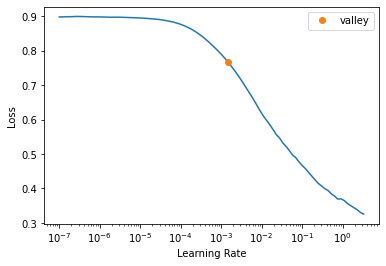

In [12]:
learn = ts_learner(dls, InceptionTime, metrics=accuracy_multi)
learn.lr_find()

In [13]:
learn = ts_learner(dls, InceptionTimePlus, metrics=[partial(accuracy_multi, by_sample=True), partial(accuracy_multi, by_sample=False)], cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=0.001445)

epoch,train_loss,valid_loss,accuracy_multi,accuracy_multi,time


KeyboardInterrupt: 